# MODEL TRAINED IN SORGHUM  TO PREDICT TOMATO

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data load

In [2]:
tomato = pd.read_csv("./data_tomato.csv", sep=",") 
sorghum = pd.read_csv('./data_sorghum.csv', sep=',')

# Data Smoothing

In [3]:
stomato = tomato
stomato['sCG'] = 0 
stomato['sCHG'] = 0 
stomato['sCHH'] = 0 
stomato['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(stomato)):
    if stomato.loc[i-1,'chr'] == stomato.loc[i,'chr']:
        stomato.loc[i, 'sCG'] = stomato.loc[i-1, 'CG']*0.1 + stomato.loc[i-1, 'sCG']*0.9
        stomato.loc[i, 'sCHG'] = stomato.loc[i-1, 'CHG']*0.1 + stomato.loc[i-1, 'sCHG']*0.9
        stomato.loc[i, 'sCHH'] = stomato.loc[i-1, 'CHH']*0.1 + stomato.loc[i-1, 'sCHH']*0.9  
        stomato.loc[i, 'srec'] = stomato.loc[i-1, 'rec']*0.1 + stomato.loc[i-1, 'srec']*0.9  
        
# Dataframes with chromosomes info
tchr1 = stomato[stomato["chr"] == "chr1"]
tchr2 = stomato[stomato["chr"] == "chr2"]
tchr3 = stomato[stomato["chr"] == "chr3"]
tchr4 = stomato[stomato["chr"] == "chr4"]
tchr5 = stomato[stomato["chr"] == "chr5"]
tchr6 = stomato[stomato["chr"] == "chr6"]
tchr7 = stomato[stomato["chr"] == "chr7"]
tchr8 = stomato[stomato["chr"] == "chr8"]
tchr9 = stomato[stomato["chr"] == "chr9"]
tchr10 = stomato[stomato["chr"] == "chr10"]
tchr11 = stomato[stomato["chr"] == "chr11"]
tchr12 = stomato[stomato["chr"] == "chr12"]

In [4]:
ssorghum = sorghum
ssorghum['sCG'] = 0 
ssorghum['sCHG'] = 0 
ssorghum['sCHH'] = 0 
ssorghum['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(ssorghum)):
    if ssorghum.loc[i-1,'chr'] == ssorghum.loc[i,'chr']:
        ssorghum.loc[i, 'sCG'] = ssorghum.loc[i-1, 'CG']*0.1 + ssorghum.loc[i-1, 'sCG']*0.9
        ssorghum.loc[i, 'sCHG'] = ssorghum.loc[i-1, 'CHG']*0.1 + ssorghum.loc[i-1, 'sCHG']*0.9
        ssorghum.loc[i, 'sCHH'] = ssorghum.loc[i-1, 'CHH']*0.1 + ssorghum.loc[i-1, 'sCHH']*0.9  
        ssorghum.loc[i, 'srec'] = ssorghum.loc[i-1, 'rec']*0.1 + ssorghum.loc[i-1, 'srec']*0.9  

# Model Trained In Sorghum

In [5]:
# TRAINING MODEL
X = ssorghum[['sCG','sCHG','sCHH']]
y = ssorghum[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

# Predictions

Correlation: 0.6700056072458838
Coefficient of Determination: 0.28387241699230126
Mean Squared Error: 0.038403980012571046


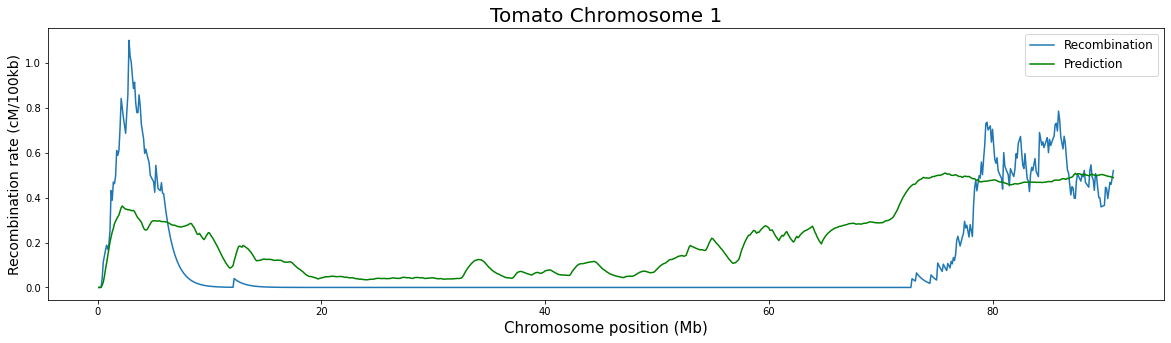

In [6]:
model_preds = model.predict(tchr1[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr1 = model_spreds      
    
#PARAMETERS
corr_chr1 = pearsonr(tchr1.srec, pchr1)
r2_chr1 = r2_score(tchr1.srec, pchr1)
mse_chr1 = mean_squared_error(tchr1.srec, pchr1)
print('Correlation:', corr_chr1[0])
print('Coefficient of Determination:', r2_chr1)
print('Mean Squared Error:', mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr1.window_end,tchr1.srec, label='Recombination')
ax.plot(tchr1.window_end,pchr1, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 1',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.842550679545732
Coefficient of Determination: 0.6158050119704892
Mean Squared Error: 0.030129901954592437


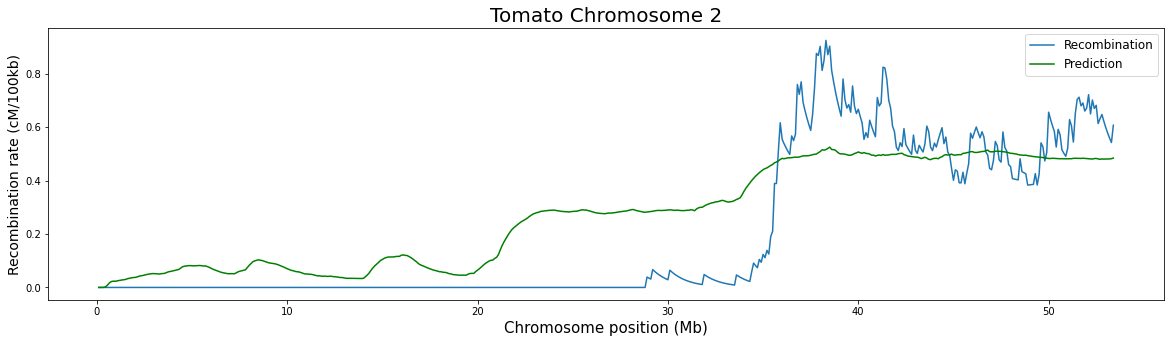

In [7]:
model_preds = model.predict(tchr2[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr2 = model_spreds      
    
#PARAMETERS
corr_chr2 = pearsonr(tchr2.srec, pchr2)
r2_chr2 = r2_score(tchr2.srec, pchr2)
mse_chr2 = mean_squared_error(tchr2.srec, pchr2)
print('Correlation:', corr_chr2[0])
print('Coefficient of Determination:', r2_chr2)
print('Mean Squared Error:', mse_chr2)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr2.window_end,tchr2.srec, label='Recombination')
ax.plot(tchr2.window_end,pchr2, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 2',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.6271668678058245
Coefficient of Determination: 0.19893744523188184
Mean Squared Error: 0.058081331235053005


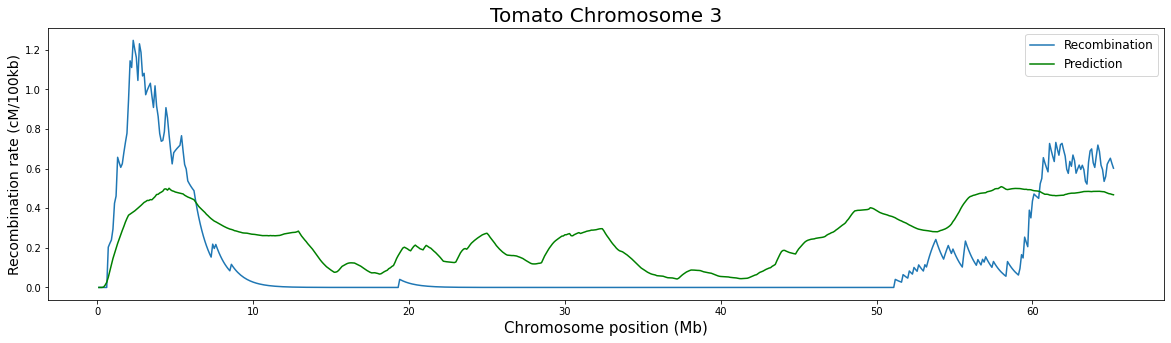

In [8]:
model_preds = model.predict(tchr3[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr3 = model_spreds      
    
#PARAMETERS
corr_chr3 = pearsonr(tchr3.srec, pchr3)
r2_chr3 = r2_score(tchr3.srec, pchr3)
mse_chr3 = mean_squared_error(tchr3.srec, pchr3)
print('Correlation:', corr_chr3[0])
print('Coefficient of Determination:', r2_chr3)
print('Mean Squared Error:', mse_chr3)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr3.window_end,tchr3.srec, label='Recombination')
ax.plot(tchr3.window_end,pchr3, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 3',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.6794706436082897
Coefficient of Determination: 0.29619252774245264
Mean Squared Error: 0.044748642749380424


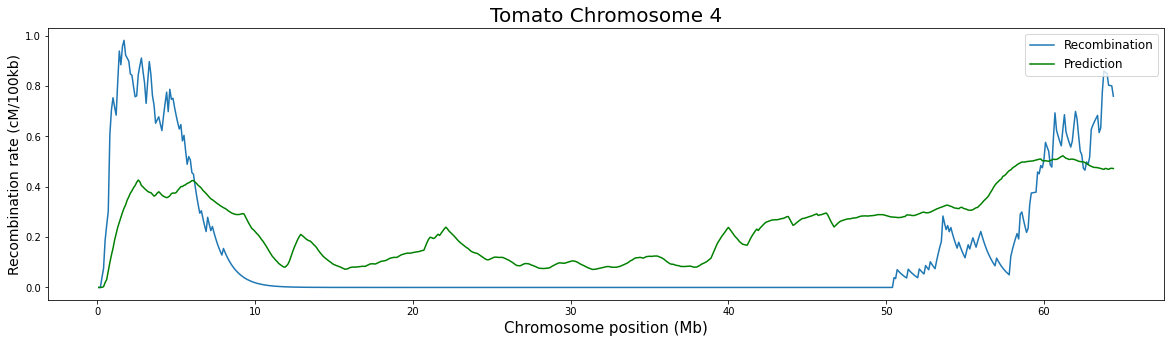

In [9]:
model_preds = model.predict(tchr4[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr4 = model_spreds      
    
#PARAMETERS
corr_chr4 = pearsonr(tchr4.srec, pchr4)
r2_chr4 = r2_score(tchr4.srec, pchr4)
mse_chr4 = mean_squared_error(tchr4.srec, pchr4)
print('Correlation:', corr_chr4[0])
print('Coefficient of Determination:', r2_chr4)
print('Mean Squared Error:', mse_chr4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr4.window_end,tchr4.srec, label='Recombination')
ax.plot(tchr4.window_end,pchr4, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 4',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.6658519929611388
Coefficient of Determination: 0.34100890435768216
Mean Squared Error: 0.06301260225141067


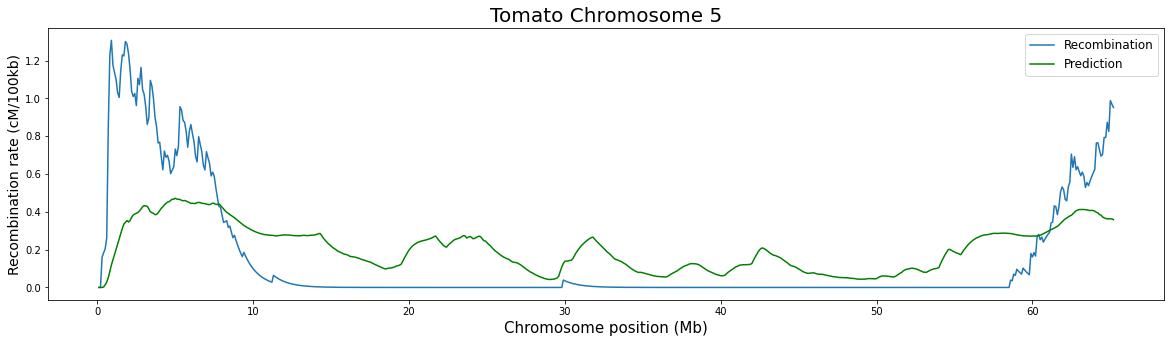

In [10]:
model_preds = model.predict(tchr5[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr5 = model_spreds      
    
#PARAMETERS
corr_chr5 = pearsonr(tchr5.srec, pchr5)
r2_chr5 = r2_score(tchr5.srec, pchr5)
mse_chr5 = mean_squared_error(tchr5.srec, pchr5)
print('Correlation:', corr_chr5[0])
print('Coefficient of Determination:', r2_chr5)
print('Mean Squared Error:', mse_chr5)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr5.window_end,tchr5.srec, label='Recombination')
ax.plot(tchr5.window_end,pchr5, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 5',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.7863852969732767
Coefficient of Determination: -0.012343344908714471
Mean Squared Error: 0.031721838348192775


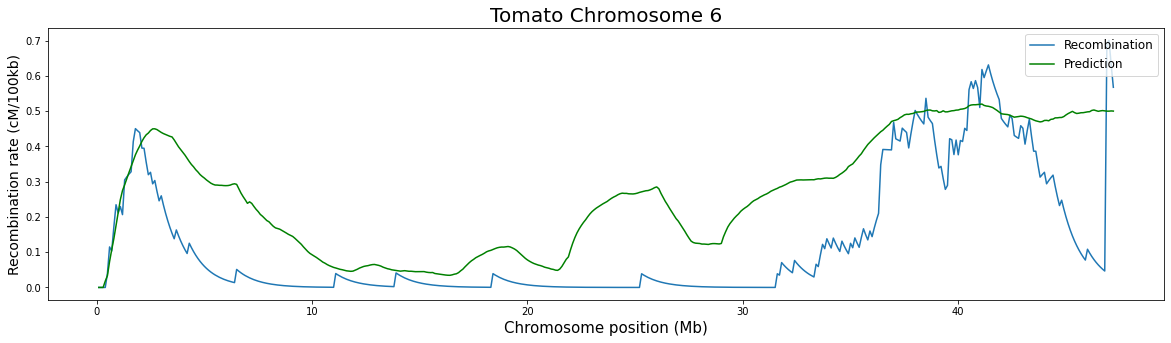

In [11]:
model_preds = model.predict(tchr6[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr6 = model_spreds      
    
#PARAMETERS
corr_chr6 = pearsonr(tchr6.srec, pchr6)
r2_chr6 = r2_score(tchr6.srec, pchr6)
mse_chr6 = mean_squared_error(tchr6.srec, pchr6)
print('Correlation:', corr_chr6[0])
print('Coefficient of Determination:', r2_chr6)
print('Mean Squared Error:', mse_chr6)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr6.window_end,tchr6.srec, label='Recombination')
ax.plot(tchr6.window_end,pchr6, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 6',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.7834453016617553
Coefficient of Determination: 0.5239972463192983
Mean Squared Error: 0.03411144669586716


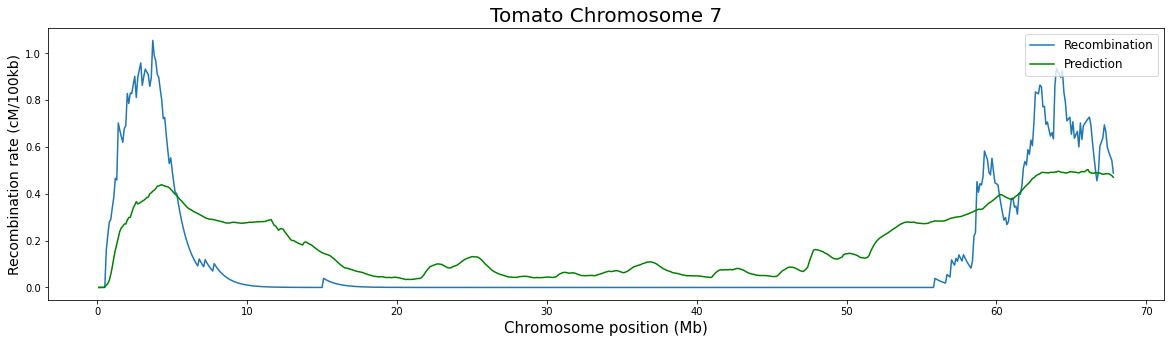

In [12]:
model_preds = model.predict(tchr7[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr7 = model_spreds      
    
#PARAMETERS
corr_chr7 = pearsonr(tchr7.srec, pchr7)
r2_chr7 = r2_score(tchr7.srec, pchr7)
mse_chr7 = mean_squared_error(tchr7.srec, pchr7)
print('Correlation:', corr_chr7[0])
print('Coefficient of Determination:', r2_chr7)
print('Mean Squared Error:', mse_chr7)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr7.window_end,tchr7.srec, label='Recombination')
ax.plot(tchr7.window_end,pchr7, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 7',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.7489420062900305
Coefficient of Determination: 0.4552077909267451
Mean Squared Error: 0.032809463844445164


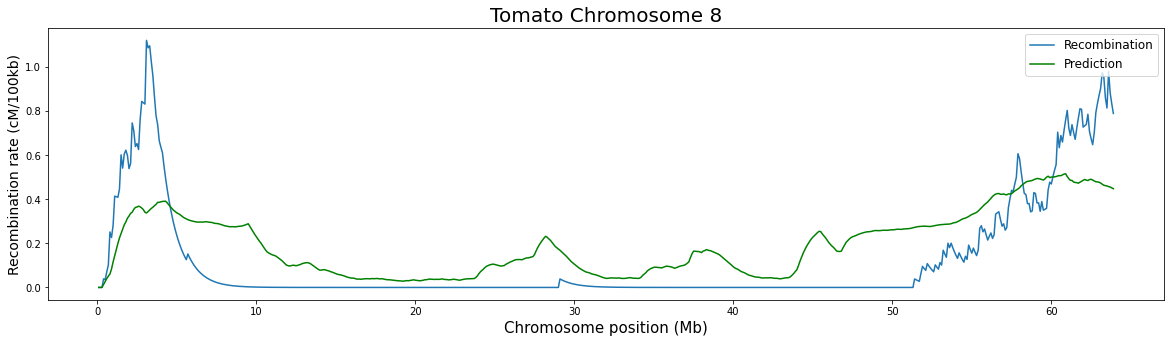

In [13]:
model_preds = model.predict(tchr8[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr8 = model_spreds      
    
#PARAMETERS
corr_chr8 = pearsonr(tchr8.srec, pchr8)
r2_chr8 = r2_score(tchr8.srec, pchr8)
mse_chr8 = mean_squared_error(tchr8.srec, pchr8)
print('Correlation:', corr_chr8[0])
print('Coefficient of Determination:', r2_chr8)
print('Mean Squared Error:', mse_chr8)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr8.window_end,tchr8.srec, label='Recombination')
ax.plot(tchr8.window_end,pchr8, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 8',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.5626688305712377
Coefficient of Determination: 0.21170206495122745
Mean Squared Error: 0.05694184124486655


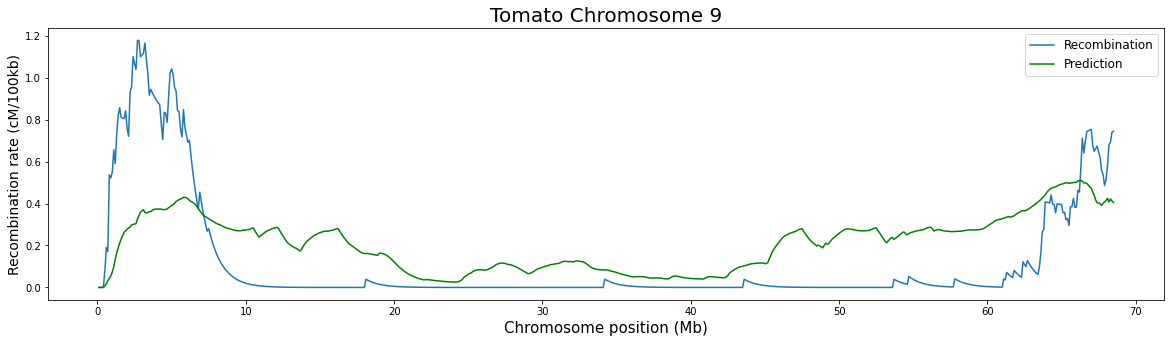

In [14]:
model_preds = model.predict(tchr9[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr9 = model_spreds      
    
#PARAMETERS
corr_chr9 = pearsonr(tchr9.srec, pchr9)
r2_chr9 = r2_score(tchr9.srec, pchr9)
mse_chr9 = mean_squared_error(tchr9.srec, pchr9)
print('Correlation:', corr_chr9[0])
print('Coefficient of Determination:', r2_chr9)
print('Mean Squared Error:', mse_chr9)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr9.window_end,tchr9.srec, label='Recombination')
ax.plot(tchr9.window_end,pchr9, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 9',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.6198869077434941
Coefficient of Determination: 0.27532928064770323
Mean Squared Error: 0.0789717624398316


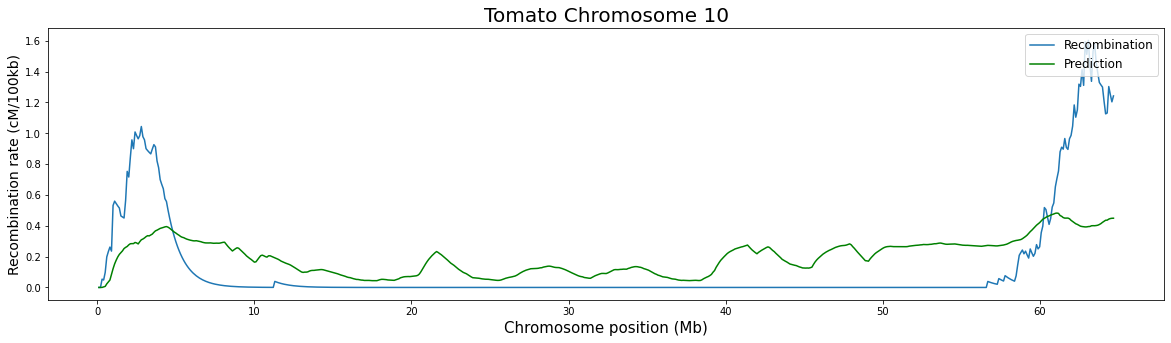

In [15]:
model_preds = model.predict(tchr10[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr10 = model_spreds      
    
#PARAMETERS
corr_chr10 = pearsonr(tchr10.srec, pchr10)
r2_chr10 = r2_score(tchr10.srec, pchr10)
mse_chr10 = mean_squared_error(tchr10.srec, pchr10)
print('Correlation:', corr_chr10[0])
print('Coefficient of Determination:', r2_chr10)
print('Mean Squared Error:', mse_chr10)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr10.window_end,tchr10.srec, label='Recombination')
ax.plot(tchr10.window_end,pchr10, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 10',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.722108687118545
Coefficient of Determination: 0.38818550022201537
Mean Squared Error: 0.05523874958659008


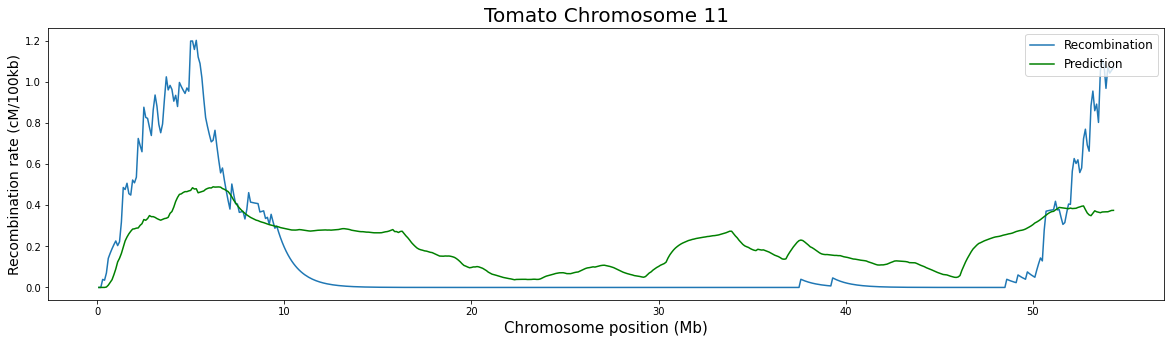

In [16]:
model_preds = model.predict(tchr11[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr11 = model_spreds      
    
#PARAMETERS
corr_chr11 = pearsonr(tchr11.srec, pchr11)
r2_chr11 = r2_score(tchr11.srec, pchr11)
mse_chr11 = mean_squared_error(tchr11.srec, pchr11)
print('Correlation:', corr_chr11[0])
print('Coefficient of Determination:', r2_chr11)
print('Mean Squared Error:', mse_chr11)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr11.window_end,tchr11.srec, label='Recombination')
ax.plot(tchr11.window_end,pchr11, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 11',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.5286568788898809
Coefficient of Determination: 0.25402002967605075
Mean Squared Error: 0.07720626800456488


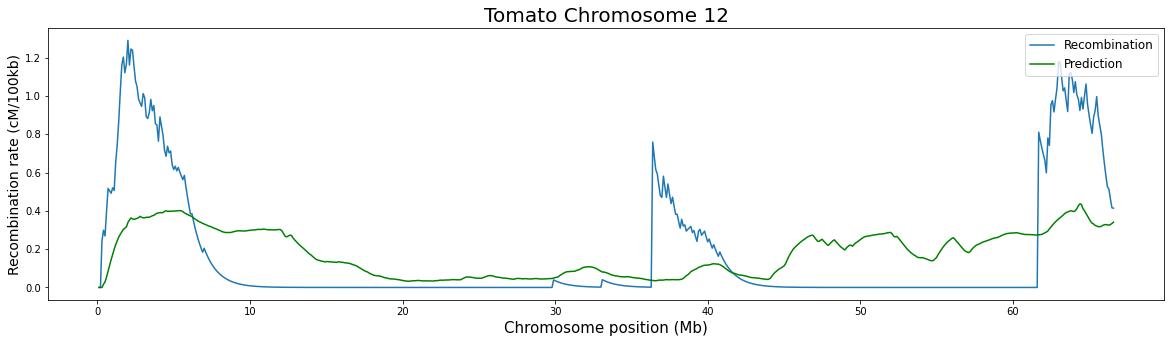

In [17]:
model_preds = model.predict(tchr12[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr12 = model_spreds      
    
#PARAMETERS
corr_chr12 = pearsonr(tchr12.srec, pchr12)
r2_chr12 = r2_score(tchr12.srec, pchr12)
mse_chr12 = mean_squared_error(tchr12.srec, pchr12)
print('Correlation:', corr_chr12[0])
print('Coefficient of Determination:', r2_chr12)
print('Mean Squared Error:', mse_chr12)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(tchr12.window_end,tchr12.srec, label='Recombination')
ax.plot(tchr12.window_end,pchr12, label = 'Prediction',  color ='green')
plt.title('Tomato Chromosome 12',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

# Compiling results

In [18]:
corr = pd.DataFrame({'corr':[corr_chr1[0], corr_chr2[0], corr_chr3[0], corr_chr4[0], corr_chr5[0], corr_chr6[0], corr_chr7[0], corr_chr8[0], corr_chr9[0], corr_chr10[0], corr_chr11[0], corr_chr12[0]]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9, r2_chr10, r2_chr11, r2_chr12]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9, mse_chr10, mse_chr11, mse_chr12]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12',]})
results = pd.concat([index, corr, r2, mse], axis=1)
results

,chr,corr,R^2,MSE
0,chr1,0.670006,0.283872,0.038404
1,chr2,0.842551,0.615805,0.030130
2,chr3,0.627167,0.198937,0.058081
3,chr4,0.679471,0.296193,0.044749
4,chr5,0.665852,0.341009,0.063013
5,chr6,0.786385,-0.012343,0.031722
6,chr7,0.783445,0.523997,0.034111
7,chr8,0.748942,0.455208,0.032809
8,chr9,0.562669,0.211702,0.056942
9,chr10,0.619887,0.275329,0.078972


In [19]:
results.describe()

,corr,R^2,MSE
count,12.000000,12.000000,12.000000
mean,0.686428,0.319326,0.050115
std,0.094315,0.164466,0.017395
min,0.528657,-0.012343,0.030130
25%,0.625347,0.243441,0.033786
50%,0.674738,0.290032,0.049994
75%,0.757568,0.404941,0.059314
max,0.842551,0.615805,0.078972
